In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing and Cleaning the Dataset

<div style="background-color:padding:20px; font-size:15px">

|       | **features** | **Information about features** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not | 
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of 0: (Low Cost), 1: (Medium Cost), 2: (High Cost), and 3: (Very High Cost) 

In [2]:
#Importing the dataset
data_set = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
data_set.head(2000)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
#Check if there is null values in any column
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#Getting information about the dataset
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [5]:
#Some records contain px_height, fc, pc, and sc_w that equal ZERO will be dropped (Noisy Data)
data_set = data_set.drop(data_set[data_set['px_height'] == 0].index)
data_set = data_set.drop(data_set[data_set['fc'] == 0].index)
data_set = data_set.drop(data_set[data_set['pc'] == 0].index)
data_set = data_set.drop(data_set[data_set['sc_w'] == 0].index)

data_set.count() #Number of remaining instance 

battery_power    1393
blue             1393
clock_speed      1393
dual_sim         1393
fc               1393
four_g           1393
int_memory       1393
m_dep            1393
mobile_wt        1393
n_cores          1393
pc               1393
px_height        1393
px_width         1393
ram              1393
sc_h             1393
sc_w             1393
talk_time        1393
three_g          1393
touch_screen     1393
wifi             1393
price_range      1393
dtype: int64

In [6]:
data_set_raw = data_set

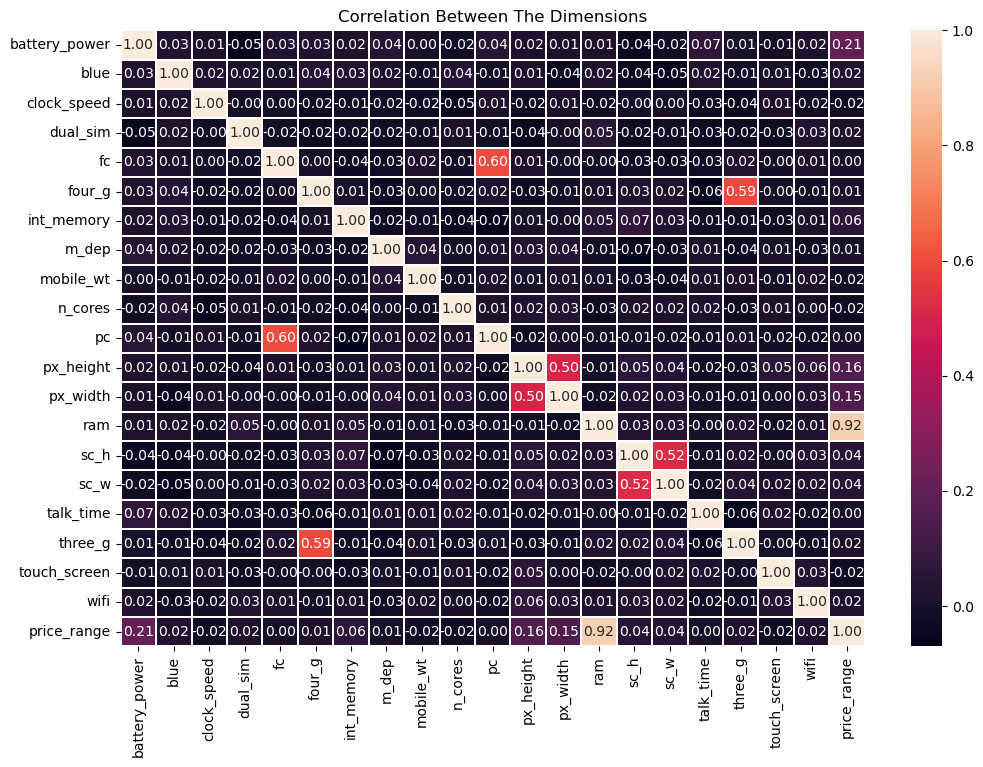

In [7]:
#Correlation matrix as a strong tool
fig=plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Correlation Between The Dimensions')
a = sns.heatmap(data_set.corr(), annot = True, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

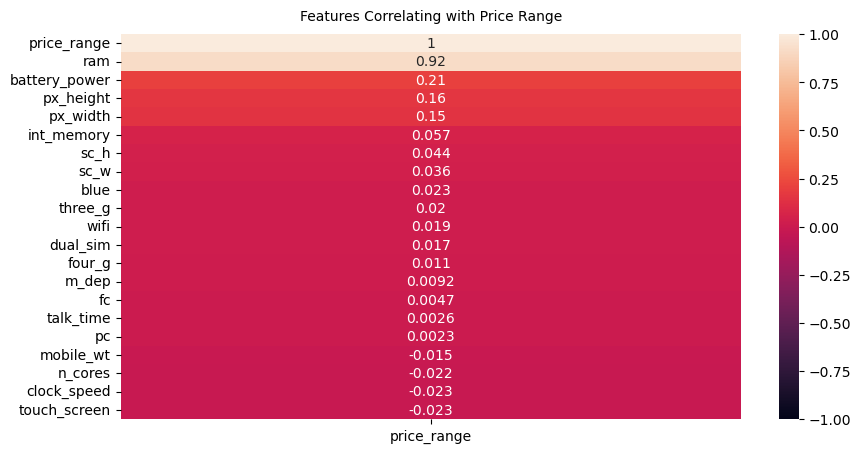

In [8]:
#price_range-class correlations
plt.figure (figsize = (10, 5), dpi = 100)
heatmap = sns.heatmap (data_set_raw.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':10}, pad = 10);

# KNN Classification Model Before Reducing Dimension and Extracting Feature

In [9]:
#Splitting the dataset into Train & Test for evaluation
X_feature, Y_class = data_set_raw.iloc[:,:-1], data_set_raw.iloc[:,-1]
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(X_feature,Y_class, test_size=0.3,random_state=42)
data_set_raw

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
#Searching k value for KNN
print("k  ", "test  ", "train")
for i in range(20):
    i+=1
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='uniform').fit(x_train_raw,y_train_raw)
    predict = model.predict(x_test_raw)
    train_accuracy = model.score(x_train_raw,y_train_raw)
    test_accuracy = model.score(x_test_raw,y_test_raw)
    print(i, " ", round(test_accuracy,3), " ", round(train_accuracy,3))

k   test   train
1   0.892   1.0
2   0.883   0.945
3   0.907   0.952
4   0.9   0.941
5   0.909   0.943
6   0.904   0.934
7   0.911   0.942
8   0.895   0.933
9   0.895   0.95
10   0.892   0.937
11   0.892   0.939
12   0.895   0.941
13   0.888   0.943
14   0.89   0.941
15   0.892   0.939
16   0.89   0.934
17   0.892   0.933
18   0.895   0.932
19   0.89   0.933
20   0.902   0.937


In [11]:
#KNN Classification 
model = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='uniform').fit(x_train_raw,y_train_raw)
predict = model.predict(x_test_raw)

#Evaluating
train_accuracy = model.score(x_train_raw,y_train_raw)
test_accuracy = model.score(x_test_raw,y_test_raw)
print("Training Score:",round(train_accuracy,2))
print("Testing Score:",round(test_accuracy,2))

Training Score: 0.94
Testing Score: 0.91


In [12]:
report = classification_report(y_test_raw,predict)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       101
           1       0.90      0.90      0.90       109
           2       0.90      0.85      0.88       107
           3       0.91      0.94      0.93       101

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



<AxesSubplot:>

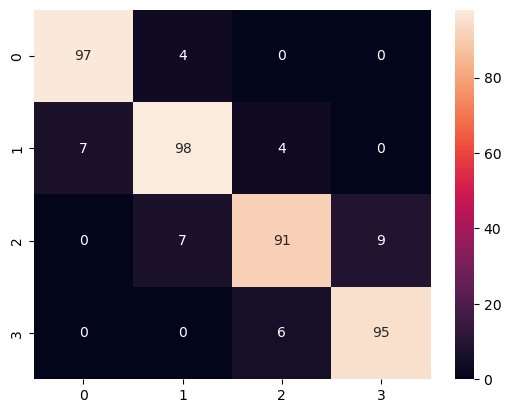

In [13]:
#Confusion matrix
cf_matrix=confusion_matrix(y_test_raw, predict)
sns.heatmap(cf_matrix, annot=True)

# Feature Extraction

In [14]:
#Feature extraction
#sc_solution = (px_height^2 + px_width^2)^1/2
data_set['sc_solution'] = (data_set['px_height'] **2 + data_set['px_width']**2)**(1/2)
data_set['sc_solution'] = data_set['sc_solution'].round(0)
data_set = data_set.drop(['px_height', 'px_width'], axis=1)
#sc_dim = (sc_h^2 + sc_w^2)^1/2
data_set['sc_dim'] = (data_set['sc_h']**2 + data_set['sc_w']**2)**(1/2)
data_set['sc_dim'] = data_set['sc_dim'].round(0)
data_set = data_set.drop(['sc_h', 'sc_w'], axis=1)
#Reorder the columns
new_cols = ["battery_power","blue", "clock_speed", "dual_sim","fc", 
            "four_g", "int_memory", "m_dep", "mobile_wt","n_cores", 
            "pc", "ram", "sc_solution", "sc_dim", "talk_time", "three_g", 
            "touch_screen", "wifi", "price_range"]
data_set=data_set[new_cols]

data_set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_solution,sc_dim,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,756.0,11.0,19,0,0,1,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,2131.0,11.0,9,1,1,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,1711.0,8.0,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1067,1935.0,17.0,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,3220,1087.0,15.0,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,1180,1898.0,7.0,4,1,1,1,0
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,3978,1511.0,23.0,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,1848.0,9.0,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,750.0,21.0,19,1,1,1,0


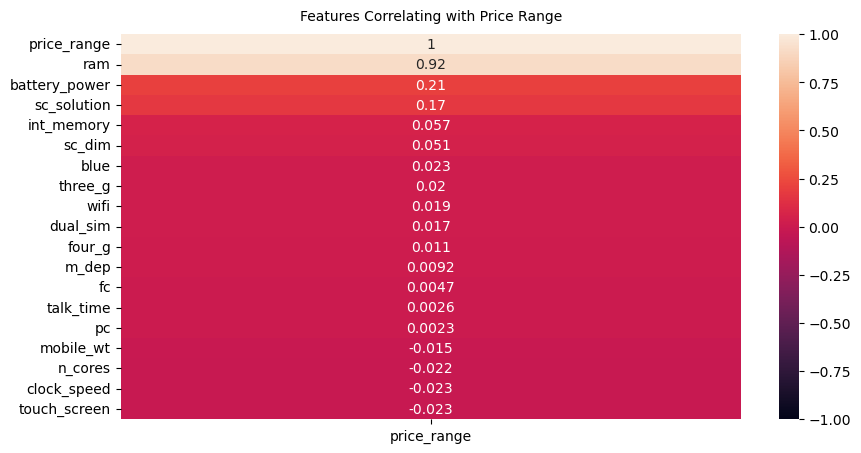

In [15]:
#price_range-class correlations after extracting feature
plt.figure (figsize = (10, 5), dpi = 100)
heatmap = sns.heatmap (data_set.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':10}, pad = 10);

# KNN Classification Model After Extracting Feature

In [16]:
#Splitting the dataset into Train & Test for evaluation
X_feature, Y_class = data_set.iloc[:,:-1], data_set.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X_feature,Y_class, test_size=0.3,random_state=42)

In [17]:
#Searching k value for KNN
print("k  ", "test  ", "train")
for i in range(20):
    i+=1
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='uniform').fit(x_train,y_train)
    predict = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    print(i, " ", round(test_accuracy,3), " ", round(train_accuracy,3))


k   test   train
1   0.897   1.0
2   0.873   0.941
3   0.9   0.952
4   0.89   0.938
5   0.895   0.943
6   0.909   0.931
7   0.904   0.938
8   0.904   0.93
9   0.907   0.939
10   0.907   0.922
11   0.904   0.927
12   0.9   0.925
13   0.89   0.926
14   0.885   0.923
15   0.89   0.926
16   0.9   0.928
17   0.892   0.927
18   0.895   0.926
19   0.892   0.924
20   0.888   0.923


In [18]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights='uniform').fit(x_train,y_train)
predict = model.predict(x_test)

#Evaluating
train_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test,y_test)
print("Training Score:",round(train_accuracy,2))
print("Testing Score:",round(test_accuracy,2))

Training Score: 0.93
Testing Score: 0.91


In [19]:
report = classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       101
           1       0.88      0.87      0.88       109
           2       0.91      0.85      0.88       107
           3       0.95      0.94      0.95       101

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



<AxesSubplot:>

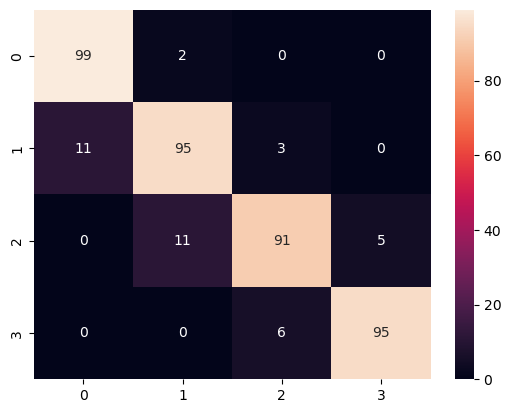

In [20]:
#Confusion matrix
cf_matrix=confusion_matrix(y_test, predict)
sns.heatmap(cf_matrix, annot=True)

# Reducing Dimension

In [21]:
#Reducing dimension
'''
new_cols = ["blue", "clock_speed", "dual_sim","fc", 
            "four_g", "int_memory", "m_dep", "mobile_wt","n_cores", 
            "pc", "sc_dim", "talk_time", "three_g", 
            "touch_screen", "wifi", "price_range"]
'''
#new_cols = ["ram", "battery_power", "sc_solution", "sc_dim", "int_memory", "price_range"]
new_cols = ["ram", "battery_power", "sc_solution","price_range"]
data_set_new=data_set[new_cols]
data_set_new

,ram,battery_power,sc_solution,price_range
0,2549,842,756.0,1
2,2603,563,2131.0,2
4,1411,1821,1711.0,1
5,1067,1859,1935.0,1
6,3220,1821,1087.0,3
...,...,...,...,...
1992,1180,674,1898.0,0
1994,3978,858,1511.0,3
1997,3057,1911,1848.0,3
1998,869,1512,750.0,0


# KNN Classification Model After Reducing Dimension and Extracting Feature

In [22]:
#Splitting the dataset into Train & Test for evaluation
X_feature, Y_class = data_set_new.iloc[:,:-1], data_set_new.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X_feature,Y_class, test_size=0.3,random_state=42)

In [23]:
#Searching k value for KNN
print("k  ", "test  ", "train")
for i in range(20):
    i+=1
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='uniform').fit(x_train,y_train)
    predict = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    print(i, " ", round(test_accuracy,3), " ", round(train_accuracy,3))

k   test   train
1   0.89   1.0
2   0.871   0.938
3   0.904   0.952
4   0.885   0.938
5   0.904   0.945
6   0.907   0.93
7   0.902   0.934
8   0.904   0.926
9   0.897   0.932
10   0.9   0.922
11   0.9   0.927
12   0.9   0.928
13   0.888   0.926
14   0.88   0.925
15   0.885   0.925
16   0.895   0.922
17   0.892   0.918
18   0.89   0.919
19   0.89   0.916
20   0.888   0.92


In [24]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights='uniform').fit(x_train,y_train)
predict = model.predict(x_test)

#Evaluating
train_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test,y_test)
print("Training Score:",round(train_accuracy,2))
print("Testing Score:",round(test_accuracy,2))

Training Score: 0.93
Testing Score: 0.91


In [25]:
report = classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       101
           1       0.88      0.87      0.88       109
           2       0.92      0.84      0.88       107
           3       0.94      0.94      0.94       101

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



<AxesSubplot:>

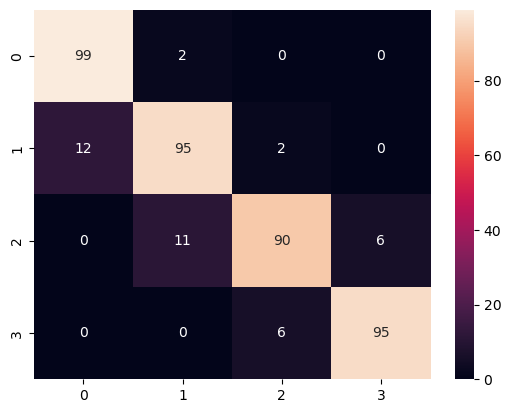

In [26]:
#Confusion matrix
cf_matrix=confusion_matrix(y_test, predict)
sns.heatmap(cf_matrix, annot=True)

# References


<p> [1] Aggarwal, A., et al.(2018). Evaluation of Smartphones in Indian Market Using EDAS. Procedia Computer Science, 132(2018), 236-243. </p>
<p> [2] Bhattacharjee, D., et al.(2023). An Integrated Machine Learning and DEMATEL Approach for Feature Preference and Purchase Intention Modelling. Decision Analytics Journal, 6(2023), 1-13. </p>
<p> [3] Singh, R., et al.(2021). Exploratory Data Analysis and Customer Segmentation for Smartphones. International Journal of Scientific Research in Engineering and Management (IJSREM), 5(5), 1-5. </p>
<p> [4] Anshori, M.Y., et al.(2021). Comparison Backpropagation (BP) and Learning Vector Quantification (LVQ) on Classifying Price Range of Smartphone in Market. Journal of Physics: Conference Series, 1836(2021), 1-10. </p>
<p> [5] Mehrotra, D., et al.(2021). Multiclass Classification of Mobile Applications as per Eenergy Consumption. Journal of King Saud University–Computer and Information Sciences, 33(2021), 719-727. </p>
<p> [6] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html, Date of Access: 28.04.2023. </p>
<p> [7] https://www.kaggle.com/code/panini92/mobile-price-classification-eda-models, Date of Access: 28.04.2023. </p>
<p> [8] https://www.kaggle.com/code/yousefelbaroudy/mobile-price-classification-98, Date of Access: 28.04.2023. </p>
<p> [9] https://www.kaggle.com/code/the314arham/99-accuracy-ensemble-learning-xgboost-knn, Date of Access: 28.04.2023. </p>
